In [61]:
%matplotlib inline 
import matplotlib.pyplot as plt
import seaborn as sb
sb.set()

import pandas as pd
import numpy as np
import time

import keras
import keras.utils as ku
import keras.models as km
import keras.layers as kl
import keras.optimizers as ko

from sklearn.metrics import confusion_matrix

# Paramètres
batch_size = 128
epochs = 10
# Vocabulary
# One epoch is when an ENTIRE dataset is passed forward and backward through neural network only once
# Batch_size : total number of training examples present in a single batch. 
# Batch_size : defines the number of samples to work through before updating the internal model parameters
# Batch_size : is the number of samples processed before the model is updated. 



import sys
print(sys.version)
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

3.6.5 |Anaconda custom (64-bit)| (default, Apr 29 2018, 16:14:56) 
[GCC 7.2.0]
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 6101269589275604520
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 10709703066
locality {
  bus_id: 1
  links {
  }
}
incarnation: 16618514957738059532
physical_device_desc: "device: 0, name: GeForce GTX 1080 Ti, pci bus id: 0000:65:00.0, compute capability: 6.1"
]


### Lecture des données d'apprentissage et de test

In [2]:
# Lecture des données d'apprentissage
N_classes = 10

# path="" # Si les données sont dans le répertoire courant sinon:
path=""
Dtrain=pd.read_csv(path+"mnist_train.zip",header=None)

X_train = Dtrain.values[:,:-1] # Reprend tout le tableau sauf la dernière colonne 
Y_train = Dtrain.values[:,-1] # Récupère la dernière colonne du tabelau qui correspond à ? 

Dtest=pd.read_csv(path+"mnist_test.csv",header=None)
X_test = Dtest.values[:,:-1]
Y_test = Dtest.values[:,-1] # label

In [3]:
Y_train_cat = ku.to_categorical(Y_train, N_classes) # convert a class vector to binary class matrix
Y_test_cat = ku.to_categorical(Y_test, N_classes) # Nombre de colonne correspond au nombre de classe
# le nombre de lignes de la matrice correspond au nombre d'éléments du vecteur original. 
# Chaque ligne corespond à un élément du vecteur initial si cet élément appartient à la j-ème classe
# ie la j-ème colonne on met 1 le reste sera par des 0.

In [4]:
X_train_conv = X_train.reshape(60000, 28, 28, 1)
X_test_conv = X_test.reshape(10000, 28, 28, 1)

### Etude des sorties de chaque couche 

#### Modèle sans décomposition des couches 

In [5]:
""""
# descrition du réseau
model = km.Sequential()
model.add(kl.Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28,28, 1), data_format="channels_last"))
model.add(kl.Conv2D(64, (3, 3), activation='relu'))
model.add(kl.MaxPooling2D(pool_size=(2, 2)))
model.add(kl.Dropout(0.25))
model.add(kl.Flatten())
model.add(kl.Dense(128, activation='relu'))
model.add(kl.Dropout(0.5))
model.add(kl.Dense(N_classes, activation='softmax'))



# Résumé
model.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               1179776   
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
__________

In [46]:
# Apprentissage
""""model.compile(loss="categorical_crossentropy",
              optimizer=ko.Adadelta(),
              metrics=['accuracy'])

model.fit(X_train_conv, Y_train_cat,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(X_test_conv, Y_test_cat))


Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 6s 94us/step - loss: 0.0316 - acc: 0.9909 - val_loss: 0.0365 - val_acc: 0.9891
Epoch 2/10
60000/60000 [==============================] - 5s 85us/step - loss: 0.0305 - acc: 0.9908 - val_loss: 0.0314 - val_acc: 0.9910
Epoch 3/10
60000/60000 [==============================] - 5s 83us/step - loss: 0.0274 - acc: 0.9918 - val_loss: 0.0347 - val_acc: 0.9913
Epoch 4/10
60000/60000 [==============================] - 5s 85us/step - loss: 0.0256 - acc: 0.9925 - val_loss: 0.0344 - val_acc: 0.9912
Epoch 5/10
60000/60000 [==============================] - 5s 83us/step - loss: 0.0263 - acc: 0.9926 - val_loss: 0.0370 - val_acc: 0.9907
Epoch 6/10
60000/60000 [==============================] - 5s 83us/step - loss: 0.0235 - acc: 0.9928 - val_loss: 0.0307 - val_acc: 0.9906
Epoch 7/10
60000/60000 [==============================] - 5s 83us/step - loss: 0.0233 - acc: 0.9931 - val_loss: 0.0386 - val_acc

In [ ]:
#model.save("model_partie_1.h5")
model = keras.models.load_model("model_partie_1.h5")

In [ ]:
model.summary()

In [64]:
model_imgs = model.predict(X_test_conv)

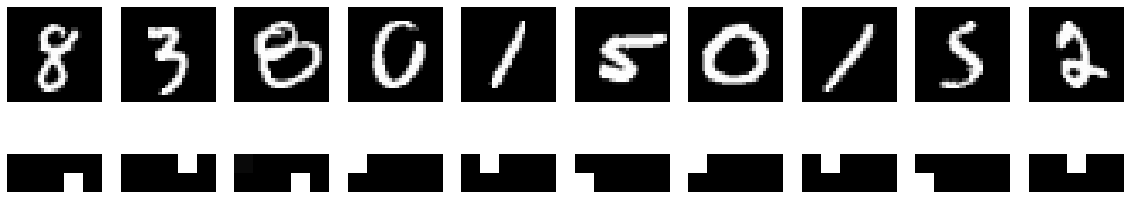

In [63]:
import matplotlib.pyplot as plt

n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i +1 )
    plt.imshow(X_test_conv[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(model_imgs[i].reshape(2, 5))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

## II. Modèle avec décomposition des couches  

In [9]:

Conv2D_1 = km.Sequential(name="conv2D1")
Conv2D_1.add(kl.Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28,28, 1), data_format="channels_last",name = "conv2D1"))

Conv2D_2 = km.Sequential(name="conv2D2")
Conv2D_2.add(kl.Conv2D(64, (3, 3), activation='relu',name ="conv2D2"))

Maxpool = km.Sequential(name="Maxpool")
Maxpool.add(kl.MaxPooling2D(pool_size=(2, 2), name ="Maxpool"))
Maxpool.add(kl.Dropout(0.25))
Maxpool.add(kl.Flatten())

Dense1 = km.Sequential(name = "dense1")
Dense1.add(kl.Dense(128, activation='relu',name ="dense1"))
Dense1.add(kl.Dropout(0.5))


Dense2 = km.Sequential(name ="dense2")
Dense2.add(kl.Dense(N_classes, activation='softmax',name ="dense2"))


modeldecomp = km.Sequential(name="modèle décomposé")
modeldecomp.add(Conv2D_1)
modeldecomp.add(Conv2D_2)
modeldecomp.add(Maxpool)
modeldecomp.add(Dense1)
modeldecomp.add(Dense2)
modeldecomp.summary()



_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2D1 (Sequential)         (None, 26, 26, 32)        320       
_________________________________________________________________
conv2D2 (Sequential)         (None, 24, 24, 64)        18496     
_________________________________________________________________
Maxpool (Sequential)         (None, 9216)              0         
_________________________________________________________________
dense1 (Sequential)          (None, 128)               1179776   
_________________________________________________________________
dense2 (Sequential)          (None, 10)                1290      
Total params: 1,199,882
Trainable params: 1,199,882
Non-trainable params: 0
_________________________________________________________________


In [10]:

modeldecomp.compile(loss="categorical_crossentropy",
              optimizer=ko.Adadelta(),
              metrics=['accuracy'])

modeldecomp.fit(X_train_conv, Y_train_cat,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(X_test_conv, Y_test_cat))


Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 6s 98us/step - loss: 0.8875 - acc: 0.8874 - val_loss: 0.0586 - val_acc: 0.9814
Epoch 2/10
60000/60000 [==============================] - 5s 90us/step - loss: 0.1038 - acc: 0.9705 - val_loss: 0.0512 - val_acc: 0.9830
Epoch 3/10
60000/60000 [==============================] - 5s 86us/step - loss: 0.0724 - acc: 0.9789 - val_loss: 0.0467 - val_acc: 0.9855
Epoch 4/10
60000/60000 [==============================] - 5s 88us/step - loss: 0.0640 - acc: 0.9814 - val_loss: 0.0397 - val_acc: 0.9874
Epoch 5/10
60000/60000 [==============================] - 5s 90us/step - loss: 0.0519 - acc: 0.9849 - val_loss: 0.0425 - val_acc: 0.9871
Epoch 6/10
60000/60000 [==============================] - 5s 86us/step - loss: 0.0432 - acc: 0.9869 - val_loss: 0.0375 - val_acc: 0.9889
Epoch 7/10
60000/60000 [==============================] - 5s 85us/step - loss: 0.0392 - acc: 0.9884 - val_loss: 0.0337 - val_acc

In [70]:
#modeldecomp.save("model_partie_2.h5")
#modeldecomp = keras.models.load_model("model_partie_2.h5")

In [71]:
#modeldecomp.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential_12 (Sequential)   (None, 26, 26, 32)        320       
_________________________________________________________________
sequential_13 (Sequential)   (None, 24, 24, 64)        18496     
_________________________________________________________________
sequential_14 (Sequential)   (None, 9216)              0         
_________________________________________________________________
sequential_15 (Sequential)   (None, 128)               1179776   
_________________________________________________________________
sequential_16 (Sequential)   (None, 10)                1290      
Total params: 1,199,882
Trainable params: 1,199,882
Non-trainable params: 0
_________________________________________________________________


In [11]:
modeldecomp_imgs = modeldecomp.predict(X_test_conv)
Conv2D_1_imgs =Conv2D_1.predict(X_test_conv)
Conv2D_2_imgs =Conv2D_2.predict(Conv2D_1_imgs)
Maxpool_imgs =Maxpool.predict(Conv2D_2_imgs)
Dense1_imgs =Dense1.predict(Maxpool_imgs)
Dense2_imgs =Dense2.predict(Dense1_imgs)


In [12]:
def selection_4(img) : # img correspond a l ensemble des sortie pour UNE SEULE image
    shape = np.shape(img)[2] 
    m = 0 
    for i in range(shape) :
        m = m + npl.norm(img[:,:,i])
    m = m / shape # cela correspond a la moyenne des normes de tous les neurones pour une image donnée 
                    # on considere cette moyenne comme etant un seuil de selection pour dire qu un neurone
                    # est activé ou non
    filtre_actif = img[npl.norm(img) > m]
    return filtre_actif
    

In [13]:
import numpy.linalg as npl

def selection_4(img) : 
    shape = np.shape(img)[2]
    m = 0
    vect_norm = np.zeros(shape)
    filtre_actif = []
    for i in range(shape) : 
        vect_norm[i] = npl.norm(img[:,:,i])
        m = m + vect_norm[i]
    m = m/shape
    for i in range(shape) :
        if vect_norm[i]>m : 
            filtre_actif += [i]
    filtre_actif = np.array(filtre_actif)
    return filtre_actif
        

In [14]:
def Affichage_select_4 (imgs,l) : 
    # n represente le nombre d'image que l'on décide de traiter
    # imgs reprensente les sorties intermédiaires d'une couche
    l = np.array(l)
    n = len(l)
    #ind = 0
    for i in (l):
        print("---------- number ", i+1 ,"-----------")
        fig = plt.figure(figsize=(20, 4))
        index_active_filter = selection_4(imgs[i,:,:,:])
        m = len(index_active_filter)
        #k = ind*m +1
        for k,j in enumerate(index_active_filter) :
            ax = fig.add_subplot(1,m,k+1) # Paramètres d'affichage ne sont pas bons
            ax.imshow(imgs[i,:,:,j])
            ax.get_xaxis().set_visible(False)
            ax.get_yaxis().set_visible(False)
            ax.set_title("%d"%j)
        #fig.suptitle("---------- number " + str(i+1) +"-----------")
        plt.show()
       
        #ind += 1

---------- number  15 -----------


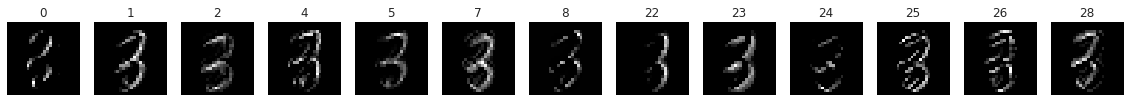

---------- number  2 -----------


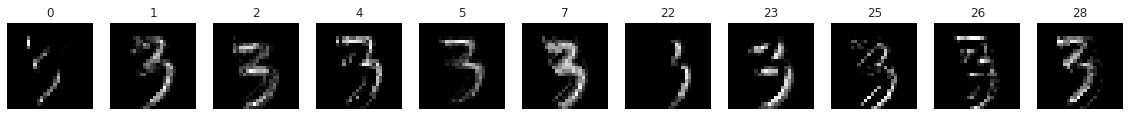

In [68]:
l = [14,1]
Affichage_select_4(Conv2D_1_imgs,l)



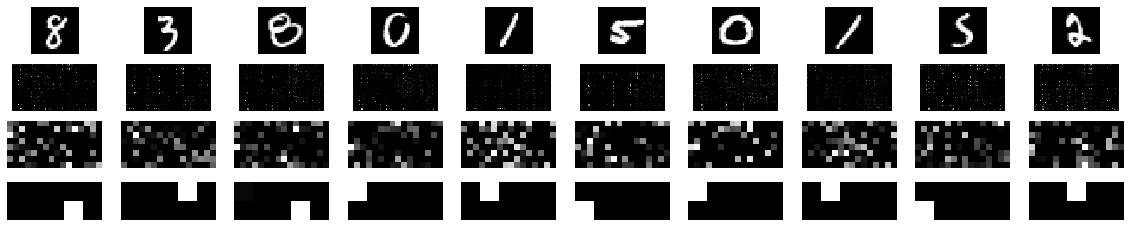

In [16]:
import matplotlib.pyplot as plt

n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(4, n, i + 1)
    plt.imshow(X_test_conv[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    
    ax = plt.subplot(4, n, i + 1 + n)
    plt.imshow(Maxpool_imgs[i].reshape(72, 128))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    
    # display output first layer Dense
    ax = plt.subplot(4, n, i + 1 + 2*n)
    plt.imshow(Dense1_imgs[i].reshape(8, 16))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    # display output last layer Dense
    ax = plt.subplot(4, n, i + 1 + 3*n )
    plt.imshow(Dense2_imgs[i].reshape(2, 5))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    
plt.show()

## III. Comportement des filtres pour différentes écritures 

### 1. Isolement des données : 

In [17]:
def Segregation_label_pd(data, label):
    data_isolated = []
    index_isolated = []
    for i in range (np.shape(data.values)[0]):
        if (data.values[i,-1]==label):
            data_isolated+= [data.values[i,:-1]]
            index_isolated += [i]
    data_isolated = np.array(data_isolated)
    index_isolated = np.array(index_isolated)
    return data_isolated,index_isolated

In [18]:
def index_active_label_set (data,label,imgs,nb_image=None) : # cette fonction nous rend en sortie l 'ensemble des 
                                # filtres activés sur toute la base de données passée en paramètre
    index_label = Segregation_label_pd(data, label)[1]
    
    if nb_image == None :
        nb_image = len(index_label)
    
    A=[]  
    for i in index_label[:nb_image]:
        index_active_filter = selection_4(imgs[i,:,:,:])
        A.extend(index_active_filter)
    return A

In [19]:
import collections

def conversion(A) : # cette fonction prend en parametre l'ensemble des filtres actifs pour un label donné, et renvoie
                    # en sortie deux tableaux, filtres et apparition.
                    # cette fonction va nous aider à ploter l histogramme
    x = collections.Counter(A)
    # on passe par un dictionnaire pour effectuer la conversion
    filtre = []
    apparition = []
    for key, value in x.items():
        filtre += [key]
        apparition += [value]
    filtre = np.array(filtre)
    apparition = np.array(apparition)
    return filtre,apparition


In [20]:
N_classes = 10

###  Couche Conv2D_1

<BarContainer object of 13 artists>

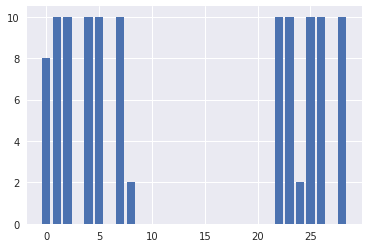

In [72]:
data = Dtest
label = 0
imgs = Conv2D_1_imgs
titi = 10
A = index_active_label_set (data,label,imgs,titi)
x = collections.Counter(A)
filtre,apparition = conversion(x)
plt.bar(filtre,apparition)

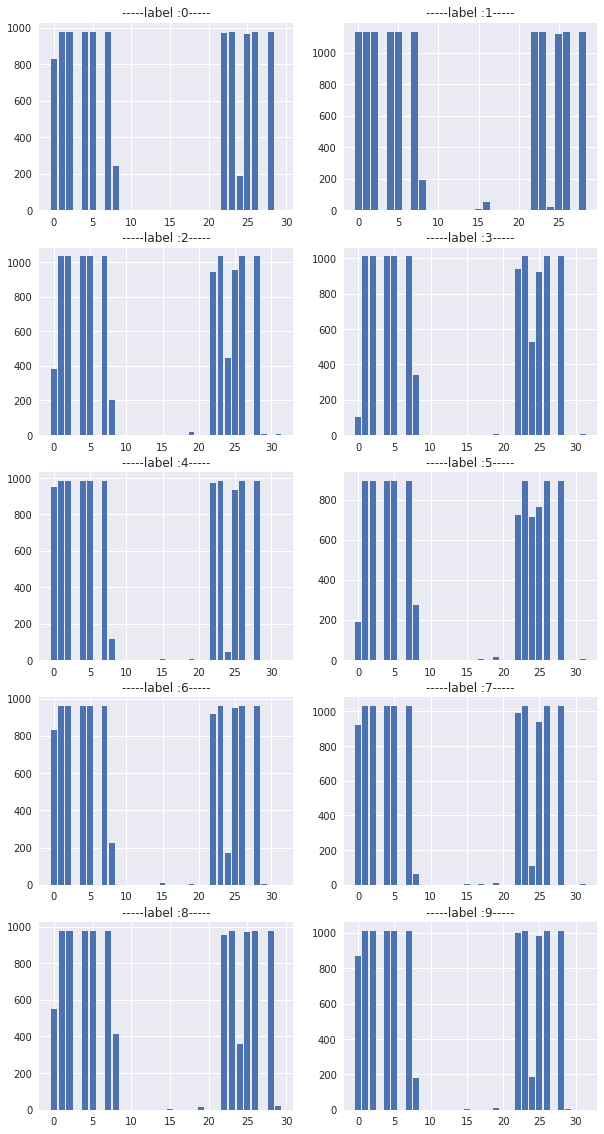

In [74]:
plt.figure(figsize=(10, 20))
for label in range(0,N_classes) :
    ax = plt.subplot(5, 2, label + 1)
    #print("label : %d"%label)
    A = index_active_label_set (data,label,imgs)
    x = collections.Counter(A)
    filtre,apparition = conversion(x)
    plt.bar(filtre,apparition)
    plt.title("-----label :"+str(label)+"-----")
plt.show()

### Resultat :

Sur cette premiere couche, on arrive pas vraiment à isoler des filtres très spetialisés dans la reconnaissance d'une classe donnée.

### Interpretation :

On remarque que pour l'ensemble des labels certains filtres ne semblent pas être activés, par exemple sur ce réseau, on voit que les filtres 1 à 4 ne sont jamais activés. on peut conclure qu'un tres grands nombres de neurones n'est pas necessairement obligatoire pour obtenir un resultat satisfaisant. 
On pourra définir un seuil pour chaque classe, ce qui nous permettra, si le seuil est elevé par exemple, de ne retenir que les filtres spécilisés dans la reconnaissance de cette classe.

Dans la partie suivante on essayera d'analyser les résultats des filtres de la couche suivante.

###  Couche Conv2D_2

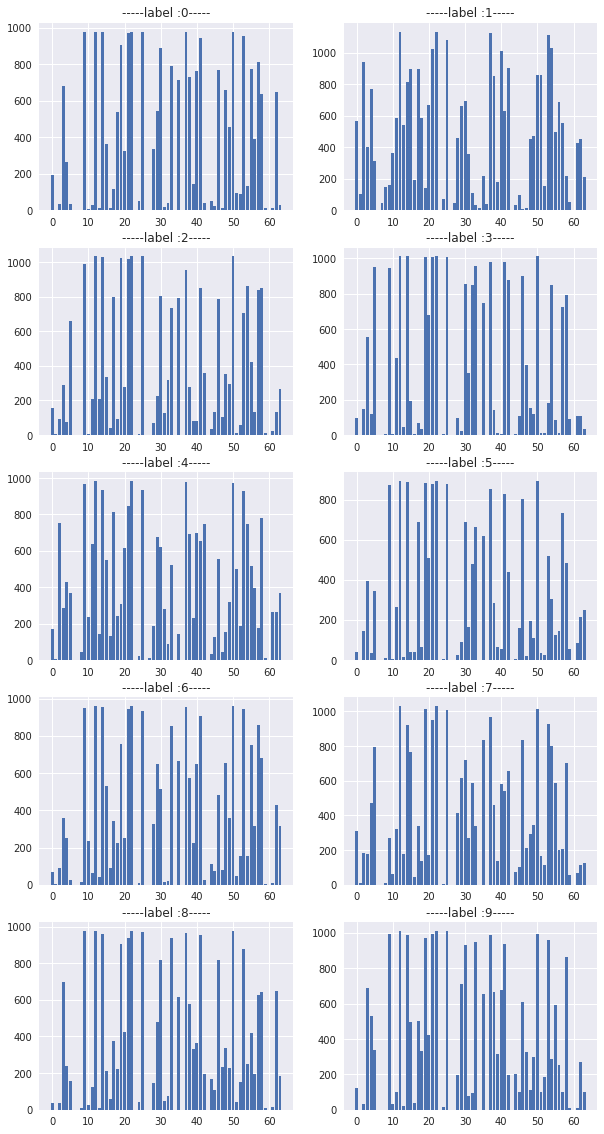

In [23]:
data = Dtest
imgs = Conv2D_2_imgs

plt.figure(figsize=(10, 20))
for label in range(0,N_classes) :
    ax = plt.subplot(5, 2, label + 1)
    A = index_active_label_set (data,label,imgs)
    x = collections.Counter(A)
    filtre,apparition = conversion(x)
    plt.bar(filtre,apparition)
    plt.title("-----label :"+str(label)+"-----")
plt.show()

## Affichage nombre d'appartition des filtres pour chacun des labels 

### Couche Conv2D_1

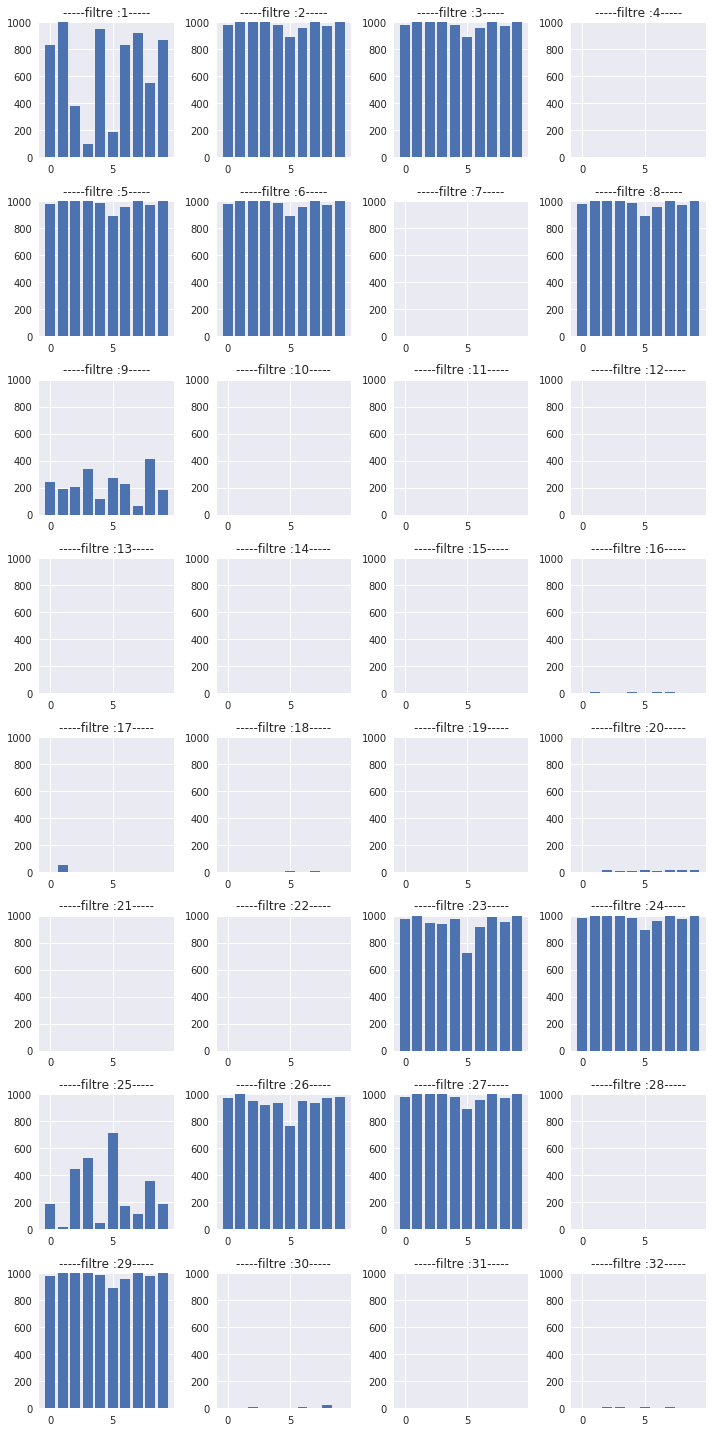

In [24]:
data = Dtest
imgs = Conv2D_1_imgs
nb_neurone = 32
toto = np.zeros((nb_neurone,10))
for label in range(0,10) :
    A = index_active_label_set (data,label,imgs)
    x = collections.Counter(A)
    filtre,apparition = conversion(x)
    for k,i in enumerate (filtre) : 
        toto[i,label]= apparition[k]

list_label =[0,1,2,3,4,5,6,7,8,9]
plt.figure(figsize=(10, 20))
for f in range(0,nb_neurone) :
    ax = plt.subplot(8, 4, f + 1)
    ax.bar(list_label,toto[f,:])
    ax.set_title("-----filtre :"+str(f+1)+"-----")
    ax.set_ylim(0,1000)
plt.tight_layout()
plt.show()

### Couche Conv2D_2

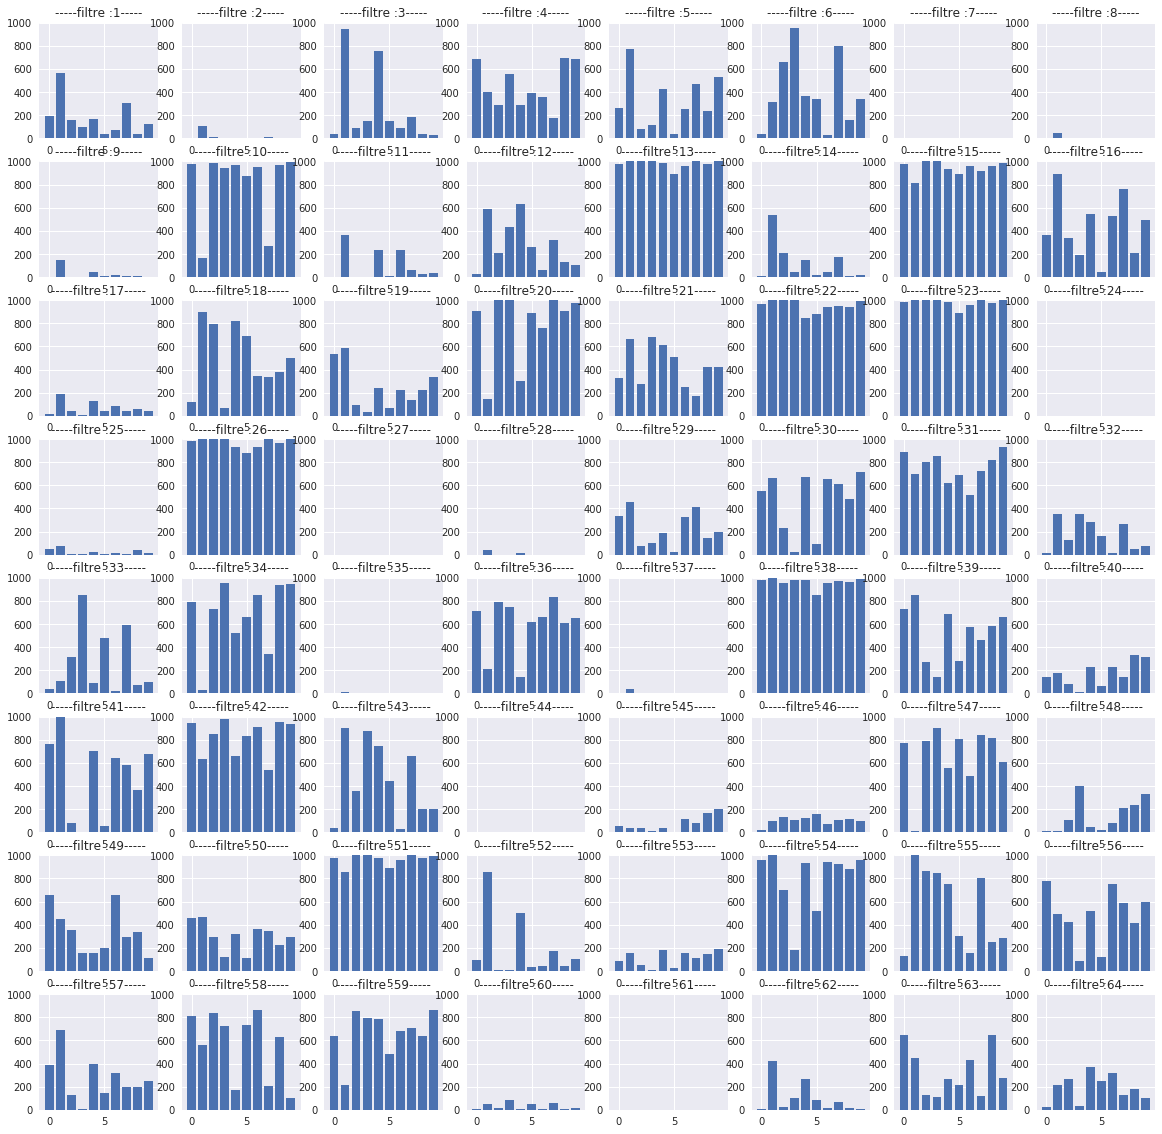

In [25]:
data = Dtest
imgs = Conv2D_2_imgs
nb_neurone = 64
toto = np.zeros((nb_neurone,10))
for label in range(0,10) :
    A = index_active_label_set (data,label,imgs)
    x = collections.Counter(A)
    filtre,apparition = conversion(x)
    for k,i in enumerate (filtre) : 
        toto[i,label]= apparition[k]

list_label =[0,1,2,3,4,5,6,7,8,9]
plt.figure(figsize=(20, 20))
for f in range(0,nb_neurone) :
    ax = plt.subplot(8, 8, f + 1)
    ax.bar(list_label,toto[f,:])
    ax.set_title("-----filtre :"+str(f+1)+"-----")
    ax.set_ylim(0,1000)

plt.show()

### 2. Apprentissage sur ce jeu de données :

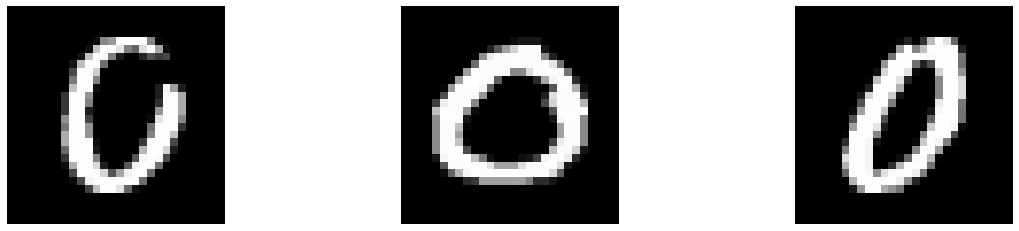

In [26]:
nb_img = 3 # how many digits we will display
label = 0
index_label = Segregation_label_pd(Dtest, label)[1][:nb_img]
length = len(index_label)  # how many digits we will display
plt.figure(figsize=(20, 4))
j = 0
for i in (index_label):
    j = j+1
    # display original
    ax = plt.subplot(1, length, j)
    plt.imshow(X_test_conv[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

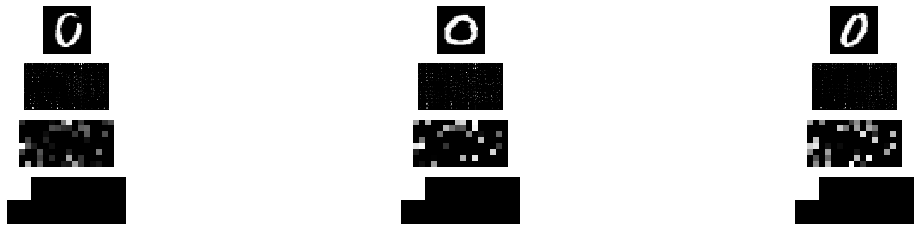

In [27]:
  
plt.figure(figsize=(20, 4))
j = 0
for i in (index_label):
    j = j+1
    # display original
    ax = plt.subplot(4, nb_img, j)
    plt.imshow(X_test_conv[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    
    ax = plt.subplot(4, nb_img, j + nb_img)
    plt.imshow(Maxpool_imgs[i].reshape(72, 128))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    
    # display output first layer Dense
    ax = plt.subplot(4, nb_img, j + 2*nb_img)
    plt.imshow(Dense1_imgs[i].reshape(8, 16))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    # display output last layer Dense
    ax = plt.subplot(4, nb_img, j + 3*nb_img )
    plt.imshow(Dense2_imgs[i].reshape(2, 5))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    
plt.show()

---------- number  4 -----------


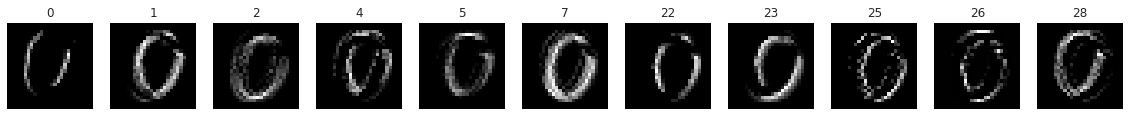

---------- number  7 -----------


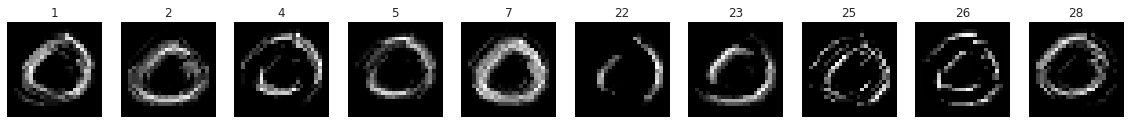

---------- number  28 -----------


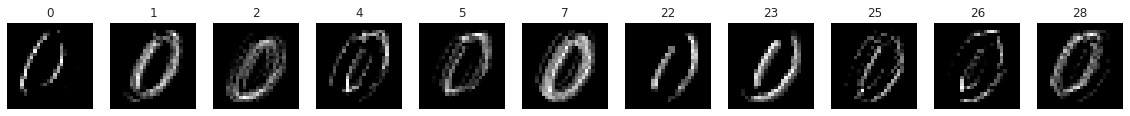

In [28]:
l = index_label
Affichage_select_4(Conv2D_1_imgs,l)


In [35]:
import collections
x = collections.Counter(A)

# A Counter is a dict subclass for counting hashable objects. It is an unordered collection where
# elements are stor ed as dictionary keys and their counts are stored as dictionary values.

In [30]:
x.items() # elle nous permet d'acceder aux items du dictionnaire

dict_items([(5, 339), (9, 996), (12, 1009), (14, 986), (19, 972), (21, 992), (22, 1009), (25, 1009), (30, 929), (32, 97), (33, 950), (37, 990), (41, 938), (46, 608), (49, 296), (50, 996), (53, 961), (55, 594), (58, 862), (0, 124), (3, 686), (4, 529), (15, 497), (29, 713), (35, 655), (38, 664), (40, 677), (44, 200), (16, 38), (17, 502), (20, 424), (56, 253), (63, 102), (18, 335), (62, 272), (47, 329), (54, 289), (39, 314), (45, 100), (51, 102), (42, 199), (28, 194), (52, 188), (48, 111), (13, 19), (10, 31), (11, 100), (31, 76), (57, 102), (59, 12), (24, 13), (2, 32), (61, 9), (8, 1), (27, 1)])

### Autre approche de sélection de filtre actifs

In [31]:
def filter_i_all_sample(i,imgs,l):
    shape = np.shape(imgs)[0] # Nombre d'image
    vect_norm = np.zeros(shape)
    for j in range(shape): # Parcours toutes les images 
        vect_norm[j] = npl.norm(imgs[j,:,:,i])# Calcule la norme du filtre i pour chacune des images. 
        #print(vect_norm[j])
    
    index = np.argsort(vect_norm) #ordonne la norme de chacune des images dans l'ordre croissant , renvoie en sortie les indices des valeurs
    l = 1. - l
    index_l = int(l*shape) # on cherche l'indice limite tel que l'on garde que  l% des valeurs de normes les plus importants.
    active_index = index[index_l:] # #on sélectionne les indices des normes les plus grandes (des filtres actifs)
    return active_index

In [32]:
# Il me faut une fonction qui me compte pour chaque label combien de fois le filtre i a été activé 

# Cette première fonction permet d'associer à chacun index le label correspondant et compte 
# pour chaque label combien de fois le filtre i a été activé
def index_to_label(active_index,data):
    shape = len(active_index)
    label_set = np.zeros(shape)
    for (k,i) in enumerate (active_index) :
        label_set[k] = data.values[i,-1]
    occurence = collections.Counter(label_set)
    return occurence


In [36]:
# Tests des deux fonctions précédentes 

filtre = 1
imgs = Conv2D_1_imgs
pourcentage = 0.1
x = filter_i_all_sample(filtre,imgs,pourcentage)
o = index_to_label(x,Dtest)
print(o.items())


dict_items([(0.0, 503), (6.0, 176), (2.0, 37), (3.0, 4), (4.0, 43), (8.0, 212), (7.0, 2), (9.0, 22), (5.0, 1)])


In [37]:
f,a = conversion(o)
print(f)
print(a)

[0. 6. 2. 3. 4. 8. 7. 9. 5.]
[503 176  37   4  43 212   2  22   1]


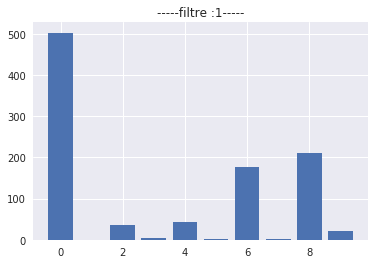

In [38]:
plt.bar(f,a)
plt.title("-----filtre :"+str(1)+"-----")
plt.show()

### Affichage des résultats pour la première couche Conv2D

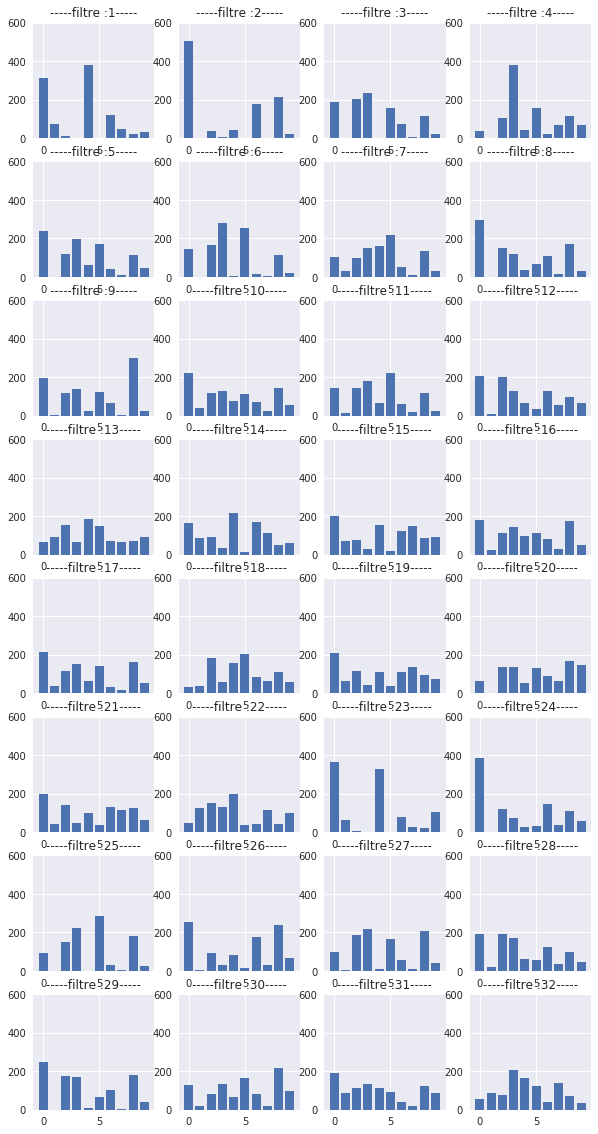

In [43]:
imgs = Conv2D_1_imgs
pourcentage = 0.1
data = Dtest
nb_neuronne= 32
plt.figure(figsize=(10, 20))
for filtre in range(nb_neuronne):
    x = filter_i_all_sample(filtre,imgs,pourcentage)
    o = index_to_label(x,data)
    f,a = conversion(o)
    ax = plt.subplot(8, 4, filtre + 1)
    ax.bar(f,a)
    ax.set_ylim(0,600)
    ax.set_title("-----filtre :"+str(filtre+1)+"-----")
plt.show()    

### Affichage des résultats pour la seconde couche Conv2D

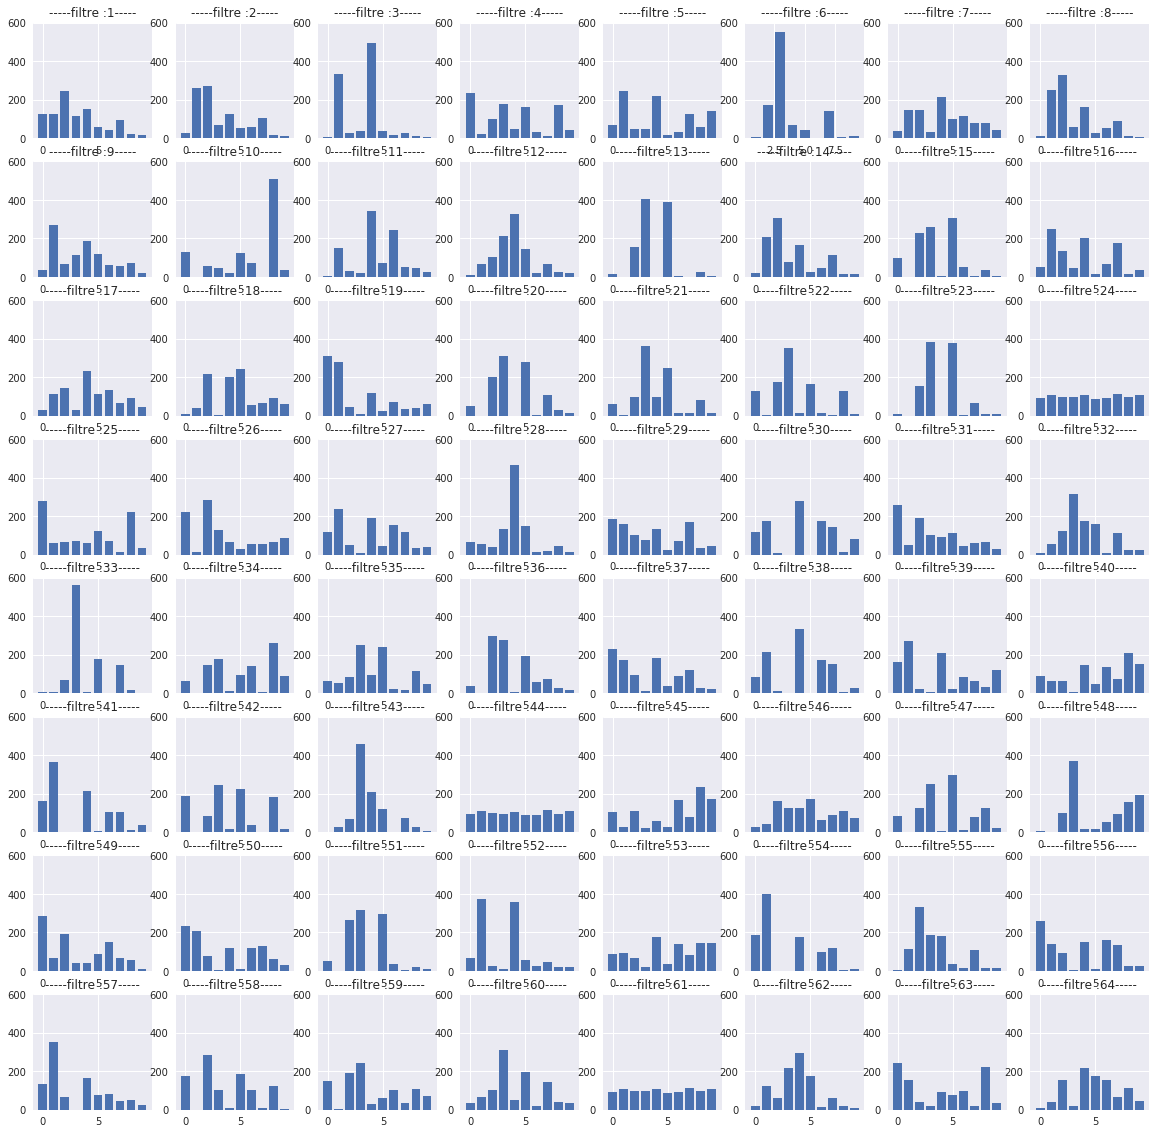

In [45]:
imgs = Conv2D_2_imgs
pourcentage = 0.1
data = Dtest
nb_neuronne= 64
plt.figure(figsize=(20, 20))
for filtre in range(nb_neuronne):
    x = filter_i_all_sample(filtre,imgs,pourcentage)
    o = index_to_label(x,data)
    f,a = conversion(o)
    ax = plt.subplot(8, 8, filtre + 1)
    ax.bar(f,a)
    ax.set_ylim(0,600)
    ax.set_title("-----filtre :"+str(filtre+1)+"-----")
plt.show()  

In [90]:
t = Conv2D_1.get_weights()
print(np.shape(t))
print(np.shape(t[0]))
print(np.shape(t[0][:,:,:,1]))

(2,)
(3, 3, 1, 32)
(3, 3, 1)


In [87]:
t[0][:,:,:,0]

array([[[-0.01263278],
        [-0.02221093],
        [-0.01864143]],

       [[ 0.02859596],
        [-0.06988493],
        [ 0.06203187]],

       [[-0.12857306],
        [-0.06357428],
        [ 0.05473189]]], dtype=float32)